# Visualize embeddings evolution while training

In [1]:
import torch
import numpy as np

import random

from dataset import Tokenizer, build_names_dataset, TensorDataset
from lr_scheduler import ConstatntLr
from optim import SgdOptimizer
from train import train
from model import MultiLayerPerceptron

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
# read names
with open("names.txt", "r") as fnames:
    names = fnames.read().splitlines()
names_cnt = len(names)

special_tokens = ['.']
vocab = special_tokens + sorted(list(set(''.join(names))))
vocab_size = len(vocab)
tokenizer = Tokenizer(vocab)

block_size = 3 # represents the length of context
random.shuffle(names)
train_bound = int(0.8*names_cnt)
val_bound   = int(0.9*names_cnt)
train_X, train_y = build_names_dataset(names[:train_bound], tokenizer, block_size)
val_X, val_y = build_names_dataset(names[train_bound:val_bound], tokenizer, block_size)
test_X, test_y = build_names_dataset(names[val_bound:], tokenizer, block_size)
train_ds = TensorDataset(train_X, train_y)
val_ds   = TensorDataset(val_X, val_y, device)

In [4]:
training_emb_history = []
def save_embeddings(model):
    training_emb_history.append(model.emb.cpu())

In [5]:
g = torch.Generator(device=device).manual_seed(7877)
model = MultiLayerPerceptron(vocab_size, block_size, emb_size=2, hidden_size=128, n_hidden=1, device=device, gen=g)
lr_provider = ConstatntLr(0.1)
optimizer   = SgdOptimizer(model.parameters(), lr_provider)

In [6]:
t_loss, v_loss = train(
    model,
    train_ds,
    val_ds,
    epoches=1,
    batch_size=182,
    optimizer=optimizer,
    step_callback=save_embeddings,
    device=device
)

epoch=0: cur_avg_train_loss=2.964950532494429, cur_val_loss=2.662562370300293


In [7]:
training_emb_history[0].data

tensor([[ 6.5243e-01, -6.6377e-01],
        [-2.3557e-01, -6.0559e-01],
        [-8.1412e-02, -1.7899e-01],
        [ 4.1414e-01, -9.6150e-01],
        [ 1.0997e+00, -4.8964e-02],
        [ 1.2060e+00,  5.7945e-01],
        [-9.0210e-02,  5.0324e-01],
        [ 3.0661e-01, -6.5465e-01],
        [-7.7928e-01, -1.3435e+00],
        [-1.0595e-01, -3.0076e-01],
        [-1.0403e-01,  2.9766e-01],
        [ 9.4726e-02,  1.5113e-03],
        [-1.0864e-01, -1.2959e+00],
        [ 2.9322e-01,  5.3260e-01],
        [ 5.4241e-01,  5.2559e-01],
        [ 1.6989e+00, -9.9985e-01],
        [ 2.1033e-01, -4.6219e-01],
        [-2.1669e-02, -4.2895e-01],
        [ 6.4602e-01,  2.6887e+00],
        [-3.9317e-01, -1.5018e+00],
        [ 6.4833e-01,  9.5097e-01],
        [ 5.7946e-02, -3.5839e-01],
        [-1.4937e+00,  1.3861e+00],
        [ 4.8043e-01, -9.2530e-01],
        [ 2.4526e+00,  9.9587e-01],
        [-2.5932e-02,  1.2593e+00],
        [-7.7186e-01,  4.6279e-01]])

In [10]:
%matplotlib notebook
fig, ax = plt.subplots()
scatter = ax.scatter([], [], s=200)

def update(frame):
    C = training_emb_history[frame]
    scatter = ax.scatter(C[:,0].data, C[:,1].data, s=200)
    x_l = C[:,0].data.min() * 1.15
    x_r = C[:,0].data.max() * 1.15
    y_l = C[:,1].data.min() * 1.15
    y_r = C[:,1].data.max() * 1.15
    ax.set_xlim(x_l, x_r)
    ax.set_ylim(y_l, y_r)
    ax.set_title(f'Frame {frame}')

animation = FuncAnimation(fig, update, frames=1004, interval=100, blit=False)
plt.show()

<IPython.core.display.Javascript object>


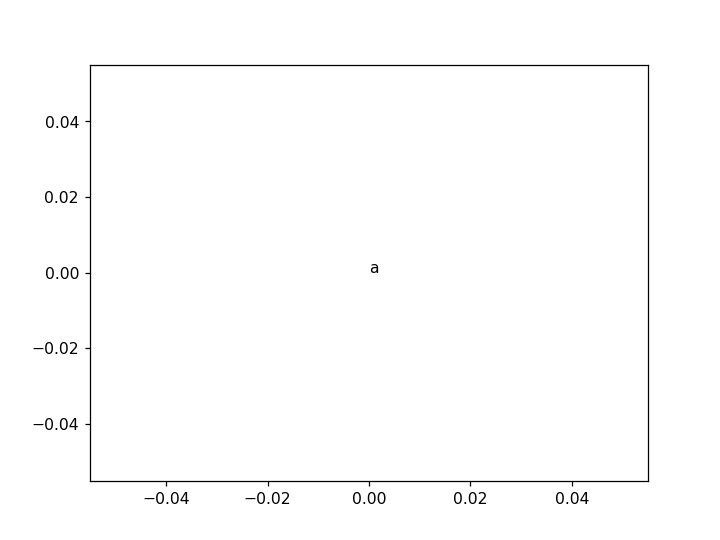

In [2]:
%matplotlib notebook
fig, ax = plt.subplots()
scatter = ax.scatter([], [], s=200)

In [16]:
C = training_emb_history[2]
scatter = ax.scatter(C[:,0].data, C[:,1].data, s=200)

In [10]:
t = ax.text(0,0,'x')

In [11]:
ax.texts

<Axes.ArtistList of 2 texts>

In [12]:
t.remove()